In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

**Part 1:** 

Use the **Fashion-MNIST** dataset for this question.

1a) Load the dataset and implement the K Means algorithm. You need to find the optimal number of clusters using the
> i) elbow_method

> ii) silhoette method



1b) Define the initial clusters’ cluster_centroids using:</br>
> i) Forgy</br>

> ii) Random Partition

1c) Experiment with different distance measures [Euclidean distance, Manhattan distance].

1d) Plot the error vs number of clusters graph while using the elbow_method method and silhouette 
    method. Report the optimal number of clusters found.


1e) Visualize the dataset to depict the clusters formed. (prefer T-SNE)

</br>
</br>
</br>
</br>


**Part 2:**
</br>
In this task, you need to implement Hierarchical clustering (agglomerative) on the same dataset.

2a) visualize a dendogram and find out the optimal number of clusters with the help of Dendogram. Explain the procedure.


2b) Implement Hierarchical clustering using: </br>
> i) single linkage

> ii) Complete linkage

>Visualize the clusters obtained using these linkages and compare. 



In [13]:
#implement Kmeans from scratch
class Kmeans:

  def __init__(self,k=2,distance="euclidean",initial_clustering="forgy",label_thresh=0):
    self.k = k                       # Number of clusters
    np.random.seed(0)                # Putting seed for random
    self.cluster_centroids = None    # cluster_centroids
    self.Y = None                    # Labels
    self.X = None            
    self.distance = distance                        # Distance method
    self.initial_clustering = initial_clustering    # How to initialise cluster
    self.label_thresh = label_thresh                

  def cluster_initialization(self):                          # Function to initialise clusters
    if self.initial_clustering == "forgy":                                          # If initialisation type is forgy
      sz = self.X.shape[0]
      random_indices = np.random.choice(sz,self.k,replace=False)       # pick K random points and assign them as cluster_centroids
      self.cluster_centroids = self.X[random_indices]
      self.Y = self.predict(self.X)
    else:
      a = np.arange(self.k)    
      sz = self.X.shape[0]                                                     # Or else randomly assign and shuffle
      b = np.random.choice(self.k,sz-self.k,replace=True)
      self.Y = np.concatenate((a,b))
      np.random.shuffle(self.Y)
      self.cluster_centroids = self.get_cluster_centroids()
  
  def predict(self,X):               # Function to get labels
    predicted_lables = []
    for x in X:
      minimumindex=0
      minimumvalue=self.distances(x,self.cluster_centroids[0])
      for index, y in enumerate(self.cluster_centroids):
        val=self.distances(x,y)
        if(val<minimumvalue):
          minimumindex=index
          minimumvalue=val
      predicted_lables.append(minimumindex)
    return np.array(predicted_lables)

  def distances(self,x1,x2):         # Function to return the distances
    if self.distance == "manhattan": dist = np.sum(np.abs(x2-x1))   # Manhattan distance
    else: dist = np.sum((x1-x2)**2)**0.5                            # Euclidean
    return dist

  def fit(self, X):          # Function to fit clusters
    np.random.seed(0)
    self.X = X
    self.cluster_initialization()
    prev_Y = np.zeros((self.X.shape[0]),dtype=self.Y.dtype)
    if self.initial_clustering == "forgy":
      self.cluster_centroids = self.get_cluster_centroids()
    while np.sum(prev_Y != self.Y) > self.label_thresh:
      prev_Y = self.Y.copy()
      self.Y = self.predict(self.X)
      self.cluster_centroids = self.get_cluster_centroids()

  def get_cluster_centroids(self):   # Function to get the cluster_centroids for all clusters
    cluster_centroids = []
    for i in range(self.k):
      cluster = self.X[self.Y==i]
      if cluster.shape[0] == 0: 
        cluster_centroids = cluster_centroids + [self.cluster_centroids[i]]
      elif self.distance == "manhattan":            # if distance parameter is manhattan then we take median of points
        cluster_centroids = cluster_centroids + [np.median(cluster,axis=0)]
      else:                                         # if distance parameter is euclidean then we take mean of points
        cluster_centroids = cluster_centroids + [np.mean(cluster,axis=0)]
    cluster_centroids = np.array(cluster_centroids)
    return cluster_centroids
  
  def distortion_value(self,X):
    distances = np.array([np.min([self.distances(x,y) for y in self.cluster_centroids]) for x in X])
    distortion = np.mean(distances**2)
    return distortion

  def silhoutte_analysis(self,X=None):
    if X is None:
      X = self.X
    Y = self.predict(X)
    scores = []
    for i,x in enumerate(X):
      if X[Y==Y[i]].shape[0] == 0: 
        a = 0
      else:
        sum=0
        itrt=0
        for y in X[Y==Y[i]]:
          sum = sum + self.distances(x,y)
          itrt = itrt + 1
        a=sum/itrt
      nearest_cluster = 0
      nearest_cluster_dist = self.distances(self.cluster_centroids[Y[i]],0)
      for j,y in enumerate(self.cluster_centroids):
        if j==Y[i]:
          continue
        dist = self.distances(self.cluster_centroids[Y[i]],y)
        if dist<nearest_cluster_dist:
          nearest_cluster=j
          nearest_cluster_dist=dist
      if nearest_cluster >= i: nearest_cluster += 1
      if X[Y==nearest_cluster].shape[0] != 0: b = np.mean([self.distances(x,y) for y in X[Y==nearest_cluster]])
      else: b = 0
      scores = scores + [(b-a)/max(a,b)]
    return np.mean(scores)

def elbow_method(trainX,testX,initial_clustering="forgy",distance="euclidean"):
  totalclusters = [1, 2, 3, 4, 5, 6, 7, 8, 9]    # These are the number of clusters I will try for
  errors = []
  for k in totalclusters:
    kmeans = Kmeans(k=k,initial_clustering=initial_clustering,distance=distance)
    kmeans.fit(trainX)
    errors.append(kmeans.distortion_value(testX))
  return totalclusters, errors

def silhouette_method(trainX,testX,initial_clustering="forgy",distance="euclidean"):
  totalclusters = [2, 3, 4, 5, 6, 7, 8, 9]       # These are the number of clusters I will try for
  scores = []
  for k in totalclusters:
    kmeans = Kmeans(k=k,initial_clustering=initial_clustering,distance=distance)
    kmeans.fit(trainX)
    scores.append(kmeans.silhoutte_analysis(testX))
  return totalclusters, scores

In [3]:
from keras.datasets import fashion_mnist
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

**As asked, now I will experiment with different parameters of K-means and find optimal number of clusters using elbow method.**

In [4]:
def test_elbow_method(initial_clustering, distance):
  train_size = 6000
  test_size = 1000
  x,y = elbow_method(trainX[:train_size],testX[:test_size],initial_clustering=initial_clustering,distance=distance)
  plt.xlabel('Total clusters')
  plt.ylabel('Distortion')
  plt.title(f"{initial_clustering} and {distance}")
  plt.plot(x,y,'o-')
  plt.title('Plot for elbow method')
  plt.show()

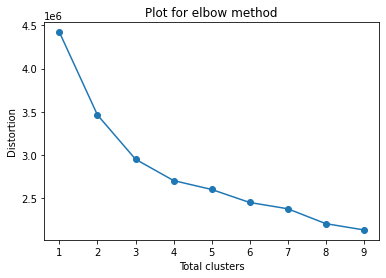

In [5]:
test_elbow_method("forgy", "eucledian")

Since the elbow is forming at k=3, it clusters seem optimal.

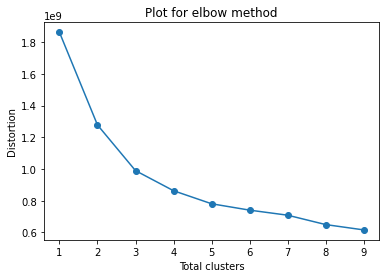

In [6]:
test_elbow_method("forgy", "manhattan")

Since the elbow is forming at k=4, it clusters seem optimal.

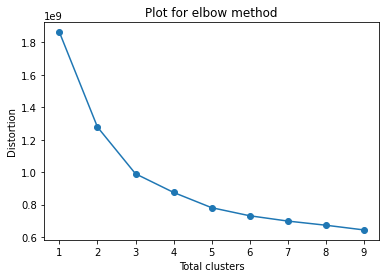

In [7]:
test_elbow_method("random", "manhattan")

Since the elbow is forming at k=3, it clusters seem optimal.

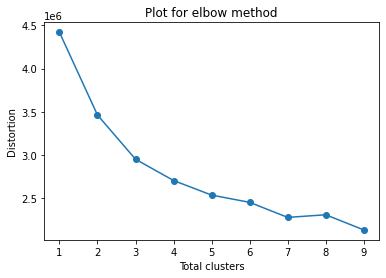

In [8]:
test_elbow_method("random", "eucledian")

Since the elbow is forming at k=3, it clusters seem optimal.

**As asked, now I will experiment with different parameters of K-means and find optimal number of clusters using silhoutte score.**

In [14]:
def test_silhouette_method(initial_clustering, distance):
  train_size = 6000
  test_size = 1000
  x,y = silhouette_method(trainX[:train_size],testX[:test_size],initial_clustering=initial_clustering,distance=distance)
  plt.title(f"{initial_clustering} {distance}")
  plt.ylabel('Silhoutte score')
  plt.xlabel('Total Clusters')
  plt.plot(x,y,'o-')
  plt.show()

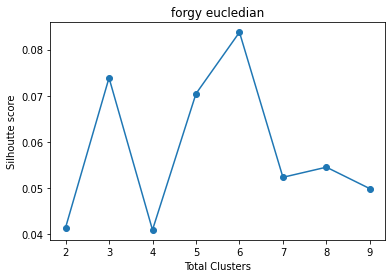

In [15]:
test_silhouette_method("forgy", "eucledian")

Silhoutte score for k=6 is highest so it is the most optimal.

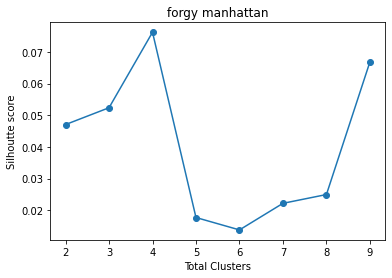

In [16]:
test_silhouette_method("forgy", "manhattan")

Silhoutte score for k=4 is highest so it is the most optimal.

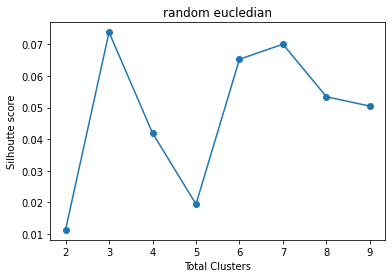

In [17]:
test_silhouette_method("random", "eucledian")

Silhoutte score for k=3 is highest so it is the most optimal.

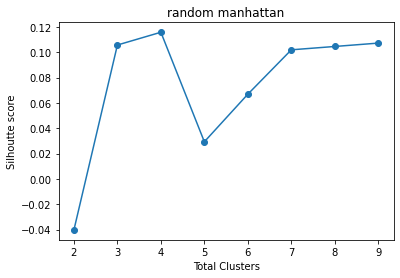

In [18]:
test_silhouette_method("random", "manhattan")

Silhoutte score for k=4 is highest so it is the most optimal.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


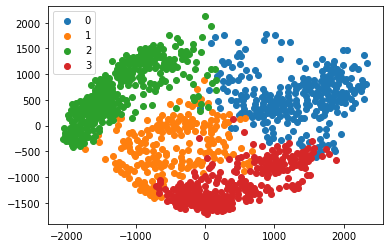

In [19]:
train_size = 6000
test_size = 1000
kmeans = Kmeans(k=4,initial_clustering="random",distance="manhattan")
kmeans.fit(trainX[:train_size])
labels = kmeans.predict(testX[:test_size])

from sklearn.manifold import TSNE
X_test_copy = testX[:test_size]
X_test_copy = X_test_copy.reshape((X_test_copy.shape[0],np.prod(X_test_copy.shape[1:])))
reduced_dim_dataset = TSNE(n_components=2, learning_rate='auto',init='pca', n_jobs=-1).fit_transform(X_test_copy)

for label in np.unique(labels):
  data = reduced_dim_dataset[labels==label]
  plt.scatter(data[:,0],data[:,1],label=f"{label}")
plt.legend()
plt.show()

**Hierarchical clustering**

In [26]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as schierarchy

def hierarchical_clustering(X_train, n_clusters, distance_threshold):
  model = AgglomerativeClustering(n_clusters=n_clusters,distance_threshold=distance_threshold)
  model.fit(X_train)
  return model

def plot_dendrogram(data,linkage_type='ward',**kwargs):
  schierarchy.dendrogram(schierarchy.linkage(data,linkage_type),**kwargs)

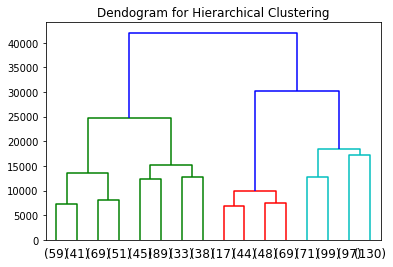

In [23]:
train_size = 6000
test_size = 1000
trainX_copy = np.copy(trainX[:train_size])
trainX_copy = trainX_copy.reshape((trainX_copy.shape[0],np.prod(trainX_copy.shape[1:])))
X_train = trainX_copy[:test_size]
model = hierarchical_clustering(X_train, None, 0)
plot_dendrogram(X_train, truncate_mode="level", p=3)
plt.title("Dendogram for Hierarchical Clustering")
plt.show()

**Question**: Explain the procedure to find the optimal number of clusters using dendogram

**Answers**  

To find the optimal number of clusters using dendogram, find the level with largest vertical distance difference between the nodes in dendogram. Here draw a horizontal line cutting the graph. The number of vertical lines that will intersect with this horizontal line are the optimal number of clusters.

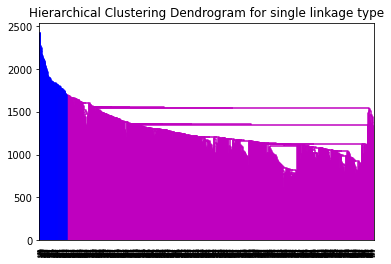

In [24]:
linkage = 'single'
plot_dendrogram(X_train,linkage_type=linkage)
plt.title("Hierarchical Clustering Dendrogram for single linkage type")
plt.show()

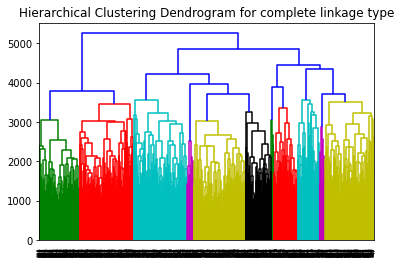

In [25]:
linkage = 'complete'
plot_dendrogram(X_train,linkage_type=linkage)
plt.title("Hierarchical Clustering Dendrogram for complete linkage type")
plt.show()

**Question:** Mention the differences observed using single and complete linkage:


Single linkage-based clustering computes the minimal dissimilarity between the clusters. Here we see that in most of the runs the cluster dendograms are larger on the right and taper as we move left.

Complete linkage-based clustering computes the maximal dissimilarity between the clusters. Here we observe that the cluster dendrograms are relatively uniformly districuted.